# IMPORTING MODULE

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# WEB SCRAPPING

In [2]:
# URL for scrapping data
url = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'

# get URL html
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

data = []

# soup.find_all('td') will scrape every
# element in the url's table
data_iterator = iter(soup.find_all('td'))

# data_iterator is the iterator of the table
# This loop will keep repeating till there is
# data available in the iterator
while True:
    try:
        country = next(data_iterator).text
        confirmed = next(data_iterator).text
        deaths = next(data_iterator).text
        continent = next(data_iterator).text

        # For 'confirmed' and 'deaths',
        # make sure to remove the commas
        # and convert to int
        data.append((
            country,
            int(confirmed.replace(',', '')),
            int(deaths.replace(',', '')),
            continent
        ))

    # StopIteration error is raised when
    # there are no more elements left to
    # iterate through
    except StopIteration:
        break

# Sort the data by the number of confirmed cases
data.sort(key = lambda row: row[1], reverse = True)
data

[('United States', 82295768, 1015357, 'North America'),
 ('India', 43040947, 521776, 'Asia'),
 ('Brazil', 30247302, 661960, 'South America'),
 ('France', 27572791, 144061, 'Europe'),
 ('Germany', 23365504, 133306, 'Europe'),
 ('United Kingdom', 21747638, 171396, 'Europe'),
 ('Russia', 18064454, 373267, 'Europe'),
 ('South Korea', 16212751, 20889, 'Asia'),
 ('Italy', 15595302, 161469, 'Europe'),
 ('Turkey', 14987583, 98532, 'Asia'),
 ('Spain', 11662214, 103266, 'Europe'),
 ('Vietnam', 10394533, 42924, 'Asia'),
 ('Argentina', 9059944, 128327, 'South America'),
 ('Netherlands', 8015576, 22156, 'Europe'),
 ('Japan (+Diamond Princess)', 7288055, 28958, 'Asia'),
 ('Iran', 7205064, 140800, 'Asia'),
 ('Colombia', 6089381, 139741, 'South America'),
 ('Indonesia', 6039266, 155844, 'Asia'),
 ('Poland', 5984940, 115838, 'Europe'),
 ('Mexico', 5725075, 323891, 'North America'),
 ('Australia', 5351477, 6762, 'Australia/Oceania'),
 ('Ukraine', 4990465, 108220, 'Europe'),
 ('Malaysia', 4372697, 35397,

# MAKING USER READABLE

In [4]:
# create texttable object
import texttable as tt
table = tt.Texttable()

# Add an empty row at the beginning for the headers
table.add_rows([(None, None, None, None)] + data)

# 'l' denotes left, 'c' denotes center,
# and 'r' denotes right
table.set_cols_align(('c', 'c', 'c', 'c'))
table.header((' Country ', ' Number of cases ', ' Deaths ', ' Continent '))

print(table.draw())


+---------------------------+-------------------+----------+-------------------+
|          Country          |  Number of cases  |  Deaths  |     Continent     |
+===========================+===================+==========+===================+
|       United States       |     82192880      | 1014114  |   North America   |
+---------------------------+-------------------+----------+-------------------+
|           India           |     43039023      |  521767  |       Asia        |
+---------------------------+-------------------+----------+-------------------+
|          Brazil           |     30210853      |  661710  |   South America   |
+---------------------------+-------------------+----------+-------------------+
|          France           |     27310055      |  143777  |      Europe       |
+---------------------------+-------------------+----------+-------------------+
|          Germany          |     23116402      |  132906  |      Europe       |
+---------------------------

# CONVERTING TO CSV FOR USAGE

In [5]:
# list of Country, Number of cases, Deaths, Continent
country = []
noc = []
deaths = []
cnt = []

for i in data:
    country.append(i[0])
    noc.append(i[1])
    deaths.append(i[2])
    cnt.append(i[3])
        
# dictionary of lists
dict = {'Country': country, 'Number of cases': noc, 'Deaths': deaths, 'Continent' : cnt}
df = pd.DataFrame(dict)
# saving the dataframe
df.to_csv('data.csv')

# SHOWING LINE GRAPH FOR NUMBER OF CASE VS DEATHS

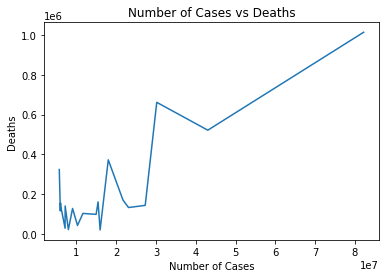

In [6]:
x = df['Number of cases']
y = df['Deaths']
plt.plot(x[:20], y[:20])
plt.xlabel('Number of Cases')
plt.ylabel('Deaths')
plt.title('Number of Cases vs Deaths')
plt.show()

# SHOWING TOP 10 DEATHS COUNTRY WISE USING PIE CHART

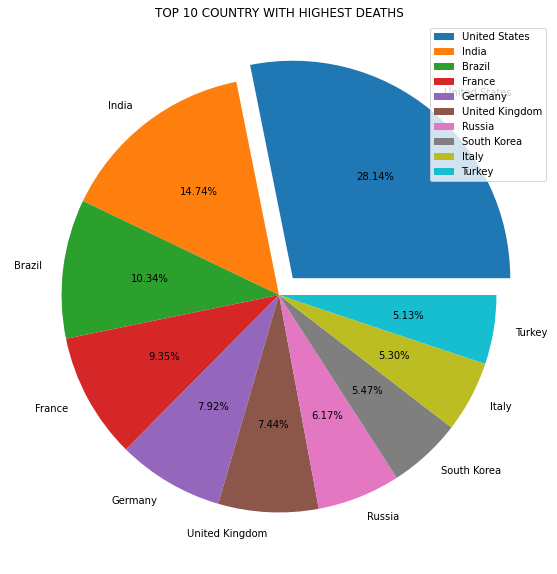

In [7]:
# data = [23, 17, 35, 29, 12, 41]
cont = df['Country'][:10]
# Creating plot
fig = plt.figure(figsize =(10, 10))
plt.pie(x[:10], labels = cont, explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0], autopct = '%1.2f%%')
# show plot
plt.title('TOP 10 COUNTRY WITH HIGHEST DEATHS')
plt.legend()
plt.show()

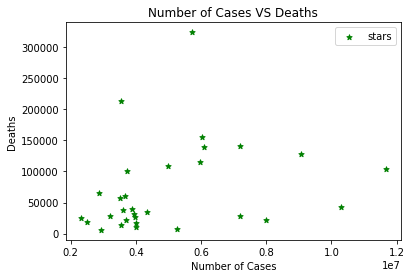

In [8]:
plt.scatter(x[10:40], y[10:40], label= "stars", color= "green",
            marker= "*", s=30)
 
# x-axis label
plt.xlabel('Number of Cases')
# frequency label
plt.ylabel('Deaths')
# plot title
plt.title('Number of Cases VS Deaths')
# showing legend
plt.legend()
 
# function to show the plot
plt.show()